In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters (same as before)
num_flights = 10
initial_seats = np.random.randint(80, 121, size=num_flights)
days_until_flight = np.random.randint(15, 31, size=num_flights)
demand_low, demand_high = 100, 200

# Generate flight data (same as before)
flights = []
for flight_id in range(num_flights):
    for day in range(days_until_flight[flight_id]):
        demand_level = np.random.uniform(demand_low, demand_high)
        flights.append({
            'flight_id': flight_id,
            'day': day,
            'days_until_flight': days_until_flight[flight_id],
            'initial_seats': initial_seats[flight_id],
            'demand_level': demand_level
        })

# Create DataFrame
flight_data = pd.DataFrame(flights)

# Pricing function (same as before)
def pricing_function(days_left, seats_left, demand_level):
    base_price = 150
    days_factor = (30 - days_left) / 30
    seats_factor = seats_left / 120
    price = base_price + 50 * days_factor - 50 * seats_factor
    price = min(max(price, 0), demand_level)
    return price

# Simulation function (updated)
def simulate_pricing_strategy(flight_data, pricing_function, num_simulations, days_before_flight, num_tickets):
    total_revenue = 0
    for _ in range(num_simulations):
        for flight_id, flight_group in flight_data.groupby('flight_id'):
            initial_seats_per_flight = flight_group['initial_seats'].iloc[0]
            for day, day_group in flight_group.groupby('day'):
                seats_left = initial_seats_per_flight
                demand_level = day_group['demand_level'].iloc[0]
                price = pricing_function(day_group['days_until_flight'].iloc[0] - day, seats_left, demand_level)
                quantity_sold = min(demand_level - price, num_tickets)
                quantity_sold = max(quantity_sold, 0)
                daily_revenue = quantity_sold * price
                total_revenue += daily_revenue
                seats_left -= quantity_sold
    
    # Calculate average revenue across simulations
    avg_revenue = total_revenue / num_simulations
    return avg_revenue

# Run the simulation
total_revenue = simulate_pricing_strategy(flight_data, pricing_function, num_simulations=200, days_before_flight=30, num_tickets=100)

# Display total revenue
print(f"Total Revenue: ${total_revenue:.2f}")

# Simulate flights and calculate average revenue for each scenario
scenarios = [
    {"days_before_flight": 30, "num_tickets": 100},
    {"days_before_flight": 14, "num_tickets": 50},
    {"days_before_flight": 2, "num_tickets": 20},
    {"days_before_flight": 1, "num_tickets": 3}
]

for scenario in scenarios:
    avg_revenue = simulate_pricing_strategy(flight_data, pricing_function, num_simulations=200, **scenario)
    print(f"Ran 200 flights starting {scenario['days_before_flight']} days before flight with {scenario['num_tickets']} tickets. Average revenue: ${avg_revenue:.0f}")


Total Revenue: $454353.53
Ran 200 flights starting 30 days before flight with 100 tickets. Average revenue: $454354
Ran 200 flights starting 14 days before flight with 50 tickets. Average revenue: $431771
Ran 200 flights starting 2 days before flight with 20 tickets. Average revenue: $254074
Ran 200 flights starting 1 days before flight with 3 tickets. Average revenue: $45978


In [75]:
def plot_revenue_by_flight(flight_data):
    flight_revenue = flight_data.groupby('flight_id').apply(lambda x: simulate_pricing_strategy(x, pricing_function, num_simulations=1, days_before_flight=30, num_tickets=100))
    flight_revenue.plot(kind='bar', xlabel='Flight ID', ylabel='Revenue', title='Revenue by Flight')
    plt.xticks(rotation=0)
    plt.show()

def plot_total_revenue_over_time(flight_data):
    total_revenue_over_time = flight_data.groupby('day').apply(lambda x: simulate_pricing_strategy(x, pricing_function, num_simulations=1, days_before_flight=30, num_tickets=100))
    total_revenue_over_time.plot(xlabel='Day', ylabel='Total Revenue', title='Total Revenue Over Time')
    plt.show()


def aggregate_demand_levels_by_flight(flight_data):
    aggregate_demand_levels = flight_data.groupby('flight_id')['demand_level'].mean()
    aggregate_demand_levels.plot(kind='bar', xlabel='Flight ID', ylabel='Average Demand Level', title='Aggregate Demand Levels by Flight')
    plt.xticks(rotation=0)
    plt.show()

def aggregate_revenue_by_days_until_flight(flight_data):
    aggregate_revenue_by_days = flight_data.groupby('days_until_flight').apply(lambda x: simulate_pricing_strategy(x, pricing_function, num_simulations=1, days_before_flight=30, num_tickets=100))
    aggregate_revenue_by_days.plot(kind='bar', xlabel='Days Until Flight', ylabel='Total Revenue', title='Aggregate Revenue by Days Until Flight')
    plt.xticks(rotation=0)
    plt.show()


In [72]:
flight_data.tail()

,flight_id,day,days_until_flight,initial_seats,demand_level
192,9,17,22,90,160.642906
193,9,18,22,90,100.919705
194,9,19,22,90,110.147154
195,9,20,22,90,166.350177
196,9,21,22,90,100.506158


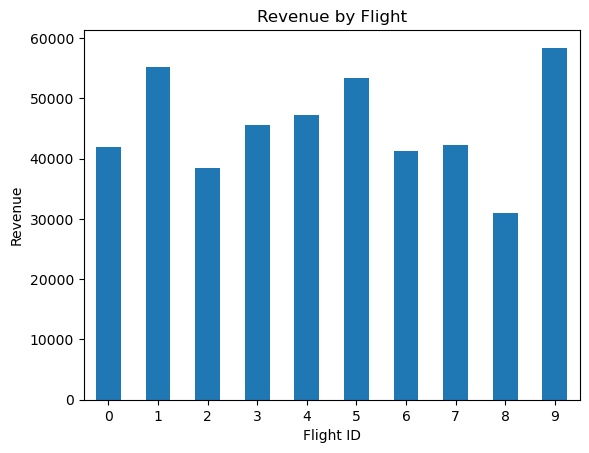

In [66]:
# Plot revenue by flight
plot_revenue_by_flight(flight_data)

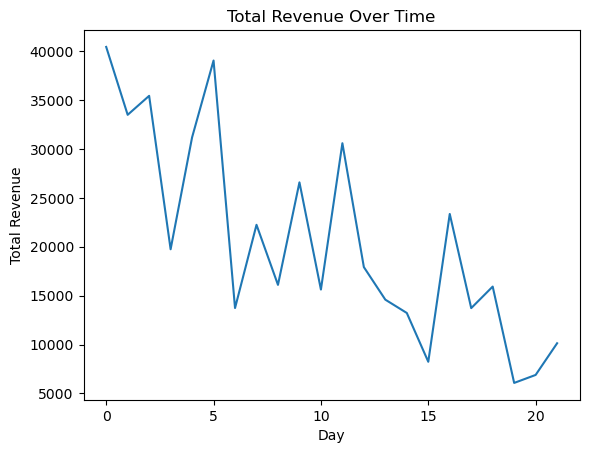

In [67]:
# Plot total revenue over time
plot_total_revenue_over_time(flight_data)

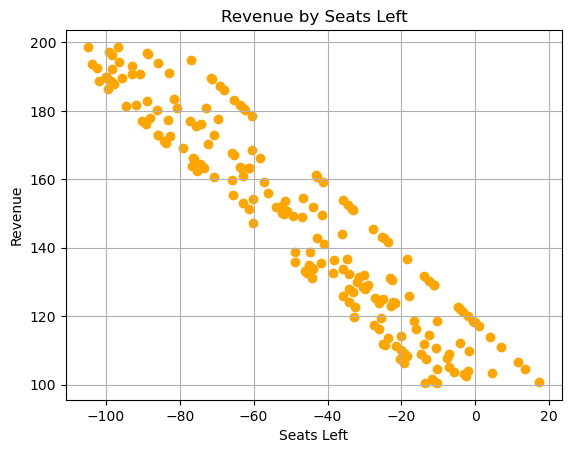

In [81]:
def plot_revenue_by_seats_left(flight_data, pricing_function):
    revenue_by_seats_left = []
    for index, row in flight_data.iterrows():
        days_left = row['days_until_flight'] - row['day']
        seats_left = row['initial_seats'] - row['demand_level']
        revenue = pricing_function(days_left, seats_left, row['demand_level'])
        revenue_by_seats_left.append(revenue)
    
    plt.scatter(flight_data['initial_seats'] - flight_data['demand_level'], revenue_by_seats_left, color='orange')
    plt.xlabel('Seats Left')
    plt.ylabel('Revenue')
    plt.title('Revenue by Seats Left')
    plt.grid(True)
    plt.show()

# Call the function to plot revenue by seats left
plot_revenue_by_seats_left(flight_data, pricing_function)


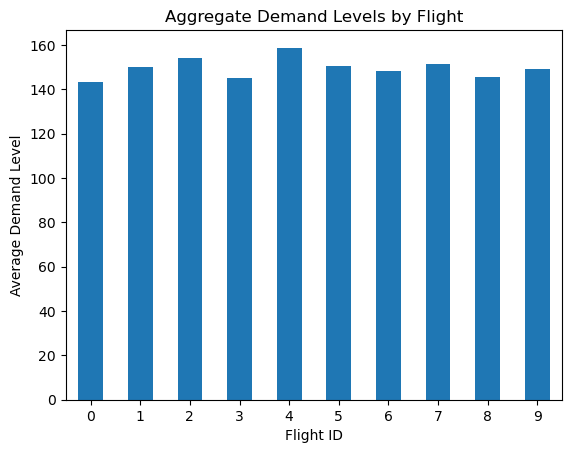

In [41]:
# Aggregate revenue by days until flight
revenue_by_days_until_flight = flight_data.groupby('days_until_flight').apply(lambda x: simulate_pricing_strategy(x, pricing_function))

# Plot revenue vs. days until flight
plt.scatter(revenue_by_days_until_flight.index, revenue_by_days_until_flight.values)
plt.xlabel('Days Until Flight')
plt.ylabel('Revenue')
plt.title('Revenue vs. Days Until Flight')
plt.grid(True)
plt.show()


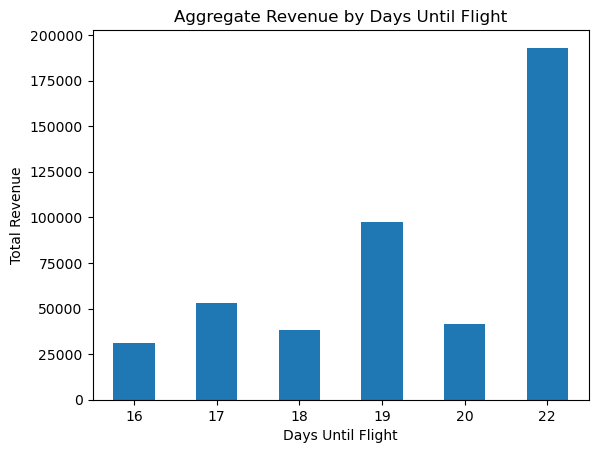

In [82]:
# Aggregate revenue by days until flight
aggregate_revenue_by_days_until_flight(flight_data)

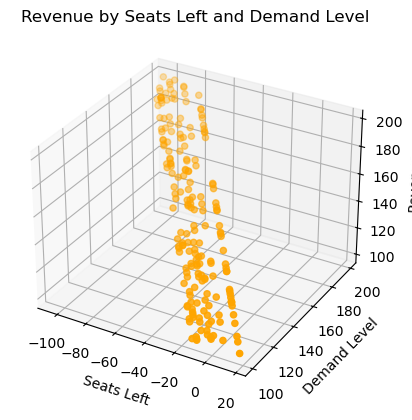

In [83]:
from mpl_toolkits.mplot3d import Axes3D

def plot_revenue_3d(flight_data, pricing_function):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    x = flight_data['initial_seats'] - flight_data['demand_level']
    y = flight_data['demand_level']
    z = []

    for index, row in flight_data.iterrows():
        days_left = row['days_until_flight'] - row['day']
        seats_left = row['initial_seats'] - row['demand_level']
        revenue = pricing_function(days_left, seats_left, row['demand_level'])
        z.append(revenue)

    ax.scatter(x, y, z, c='orange', marker='o')
    
    ax.set_xlabel('Seats Left')
    ax.set_ylabel('Demand Level')
    ax.set_zlabel('Revenue')
    ax.set_title('Revenue by Seats Left and Demand Level')
    
    plt.show()

# Call the function to plot revenue by seat left and demand level
plot_revenue_3d(flight_data, pricing_function)
